Import libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor


Load the dataset

In [79]:
df = pd.read_csv(r"C:\Users\noufi\Downloads\laptop_prices.csv")
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [80]:
df.shape

(1275, 23)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

Data preprocessing

In [82]:
#check for missing values
df.isnull().sum()
df = df.dropna()

In [83]:
#Strip spaces frpm column names
df.columns = [c.strip() for c in df.columns]


In [84]:
#Convert categorical data to numerical using One-hot encoding
df = pd.get_dummies(df, columns=['Company','CPU_company','GPU_company'], drop_first=True)


In [85]:
#select features and target
print(df.columns.tolist())

X = df.drop('Price_euros', axis=1)  # features(independent variable)
y = df['Price_euros']               # target(dependent variable)


['Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight', 'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_freq', 'CPU_model', 'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_model', 'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom', 'Company_Microsoft', 'Company_Razer', 'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'CPU_company_Intel', 'CPU_company_Samsung', 'GPU_company_ARM', 'GPU_company_Intel', 'GPU_company_Nvidia']


In [86]:
#identify numerical and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

print("Numeric columns-", numeric_features.tolist())
print("Categorical columns-", categorical_features.tolist())

Numeric columns- ['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']
Categorical columns- ['Product', 'TypeName', 'OS', 'Screen', 'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_model', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_model']


In [87]:
#preprocessing for numerical and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [88]:
#bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [89]:
#define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

Train-test split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Train the model

In [91]:
model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [92]:
y_pred = model.predict(X_test)


In [93]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE:{rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")


MSE: 90531.44
RMSE:300.88
MAE: 218.29
R²: 0.8176


Visualizing the result for actual vs prediction

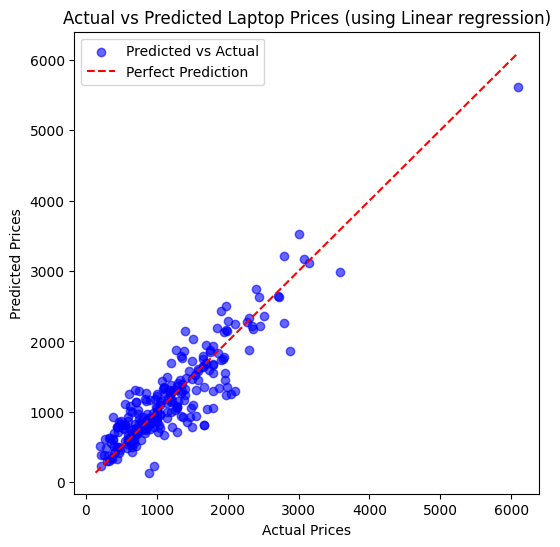

In [94]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
min_v = min(y_test.min(), y_pred.min())
max_v = max(y_test.max(), y_pred.max())

# Adding reference line for perfect prediction
plt.plot([min_v, max_v], [min_v, max_v], 'r--', label='Perfect Prediction')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Laptop Prices (using Linear regression)")
plt.legend()
plt.show()

Using RandomForestRegressor

In [95]:
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
#define numerical and categorical columns
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [97]:
#preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
    ]
)

In [98]:
#pipeline
rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(n_estimators=300, random_state=42))
])


In [99]:
#train the model
rf_pipeline.fit(X_train, y_train)
#predict
rf_pred = rf_pipeline.predict(X_test)

c:\Users\noufi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 7, 10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [100]:
#evaluating
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)

print("Random Frest Pipeline Performance:")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R²:   {r2:.4f}")

Random Frest Pipeline Performance:
MSE:  64804.70
RMSE: 254.57
MAE:  168.74
R²:   0.8694


Observation: RandomForestmodel gives the best R2 performance

Visualizing the result for actual vs prediction

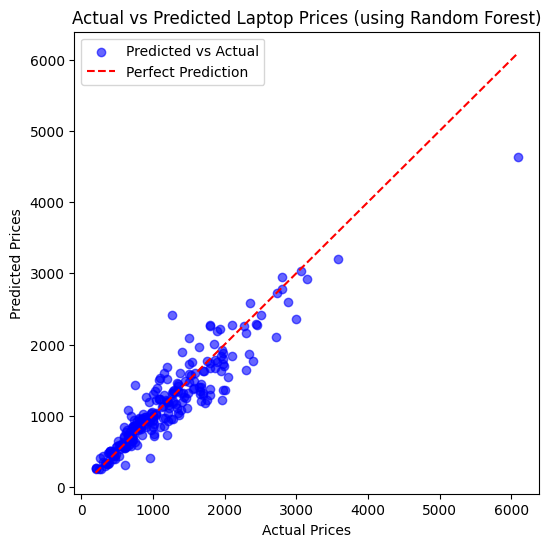

In [101]:



plt.figure(figsize=(6,6))
plt.scatter(y_test, rf_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
min_v = min(y_test.min(), rf_pred.min())
max_v = max(y_test.max(), rf_pred.max())

# Add reference line for perfect prediction
plt.plot([min_v, max_v], [min_v, max_v], 'r--', label='Perfect Prediction')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Laptop Prices (using Random Forest)")
plt.legend()
plt.show()


EDxploratory Data Analysis- Univariate analysis

<Axes: xlabel='Ram'>

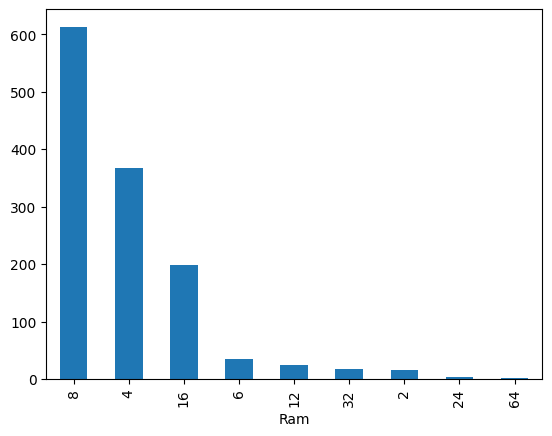

In [102]:
df['Ram'].value_counts().plot(kind='bar')

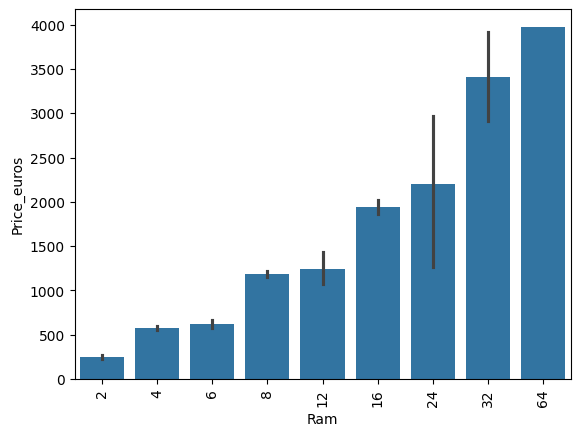

In [103]:
sns.barplot(x=df['Ram'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [104]:
df['OS'].value_counts()

OS
Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

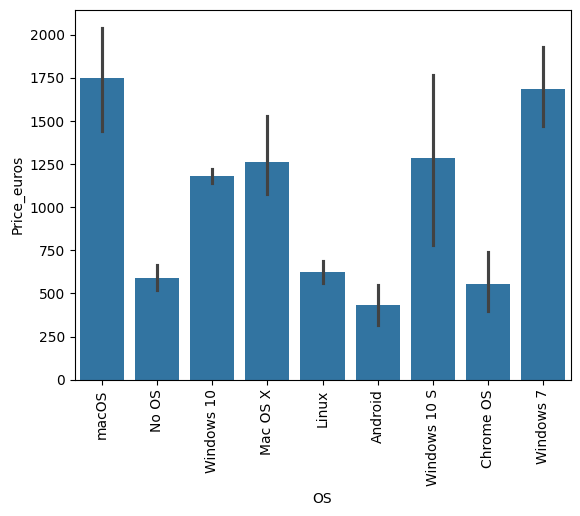

In [105]:
sns.barplot(x=df['OS'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

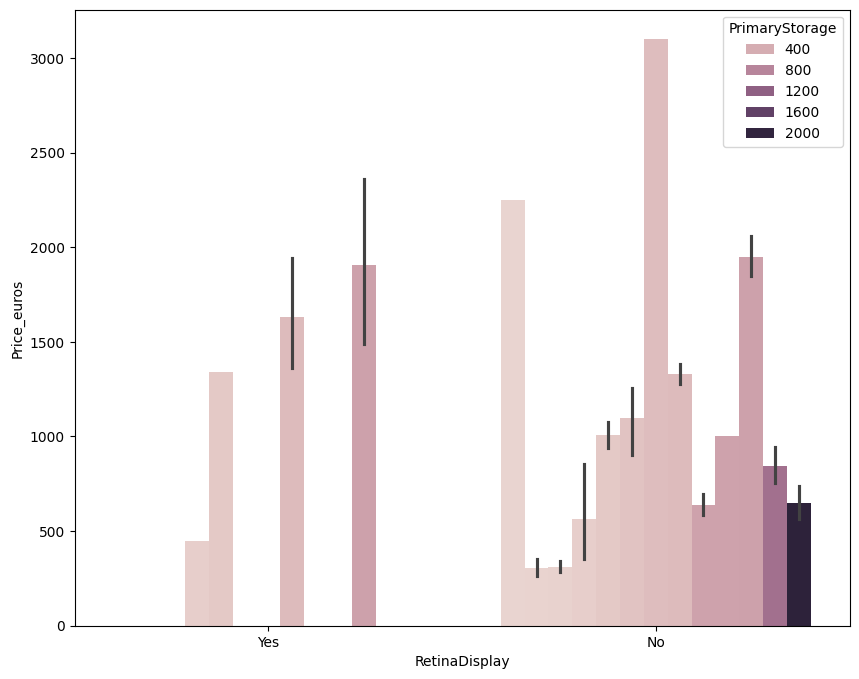

In [106]:
plt.figure(figsize = (10,8))
sns.barplot(x = df['RetinaDisplay'], y= df['Price_euros'],hue = df['PrimaryStorage'])
plt.show()


<Axes: xlabel='CPU_freq', ylabel='Ram'>

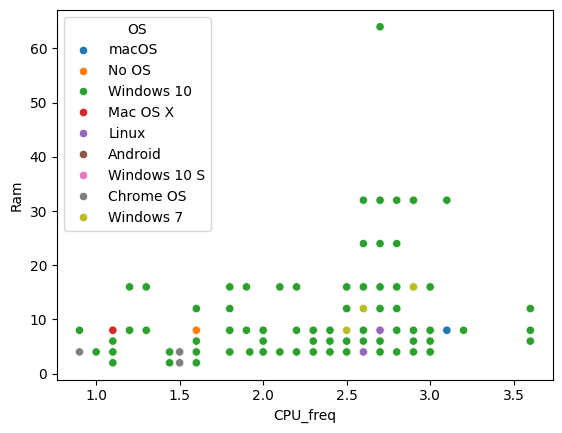

In [107]:
sns.scatterplot(data = df , x= df['CPU_freq'], y =df['Ram'], hue = df['OS'])

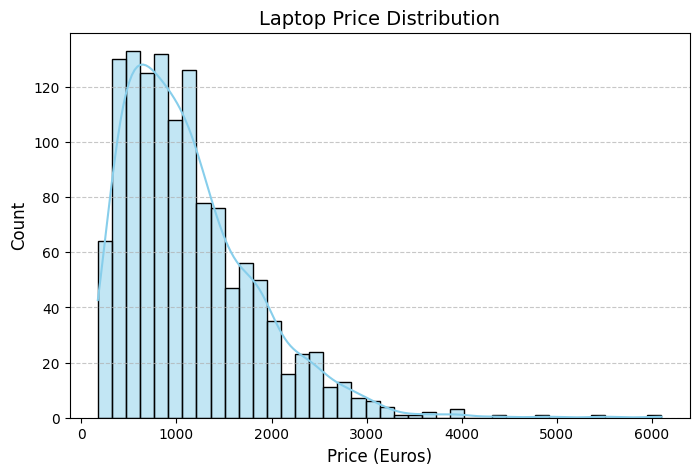

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Price_euros'], bins=40, kde=True, color='skyblue')
plt.title('Laptop Price Distribution', fontsize=14)
plt.xlabel('Price (Euros)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


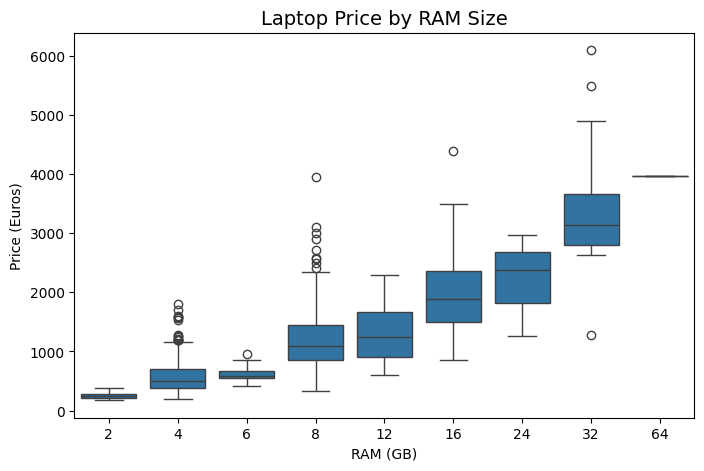

In [110]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Ram', y='Price_euros', data=df)
plt.title('Laptop Price by RAM Size', fontsize=14)
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euros)')
plt.show()

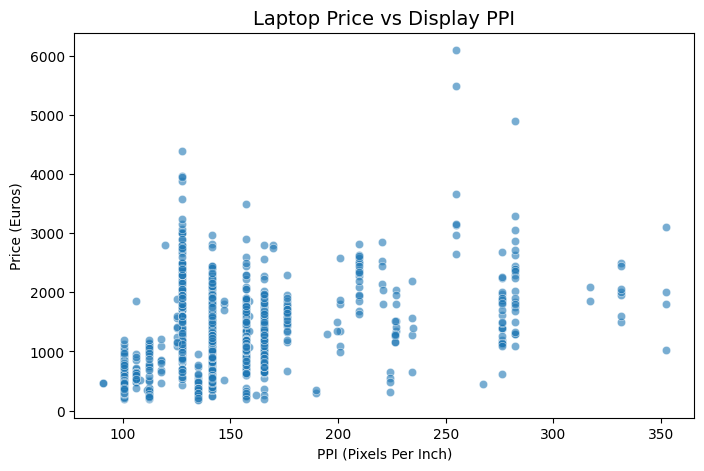

In [112]:
if 'PPI' not in df.columns and {'ScreenW', 'ScreenH', 'Inches'}.issubset(df.columns):
    df['PPI'] = np.sqrt(df['ScreenW']**2 + df['ScreenH']**2) / df['Inches']
    
plt.figure(figsize=(8,5))
sns.scatterplot(x='PPI', y='Price_euros', data=df, alpha=0.6)
plt.title('Laptop Price vs Display PPI', fontsize=14)
plt.xlabel('PPI (Pixels Per Inch)')
plt.ylabel('Price (Euros)')
plt.show()